# Introduction to Machine Learning: Putting it all together

The aim of this notebook is to bring together the previous few weeks work to understand the process of training and predicting using the code we have written. The process is split into a few key sections:

1. Augment the data and save it in a HDF5 file
2. Load in a given network architecture and train the model
3. Save the trained network
4. Perform any desired postprocessing
5. Run a prediction

In this notebook we shall work through these stages step-by-step. We will firstly look at the raw code at each stage to get an understanding of the underlying processess. Once they have been understood, at least at a higher level, the actual code can be run.

We shall begin by going through some of the code from last week so as to cement the knowledge of the syntax behind training and predicting from a neural network.

In [1]:
import os, sys
import numpy as np
import h5py
import matplotlib.pyplot as plt

#import Keras sub-modules
from keras.models import Model #functional API for Keras (best for greater flexibility)
from keras.layers import Input, Concatenate, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense #'main' layers
from keras.layers import BatchNormalization, Dropout #regulartisation layers
from keras.layers import Activation
from keras.optimizers import * #import all optimisers
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, CSVLogger #callbacks for model performance analysis
from keras.metrics import categorical_accuracy #metrics for model performance
from keras import backend as K #gives backend functionality
from keras import losses #imports pre-defined loss functions
from keras.models import load_model #allows pre-trained models to be called back

Using TensorFlow backend.


Here we load in a much larger network than last week. This network is the backbone of the final architecture style we will choose. We will cover more on in later.

In [2]:
from DoubleLinked import model as mod

All the data and labels we have been working with so far have been stored in hdf5 files. This file type compresses the data for convenient storage, as well as offering accessibility through a 'key' system.

In [3]:
hdf5_path = "./Humans_CT_Phantom_s200.hdf5"
dataset = h5py.File(hdf5_path , 'r')

train_images = dataset['train_img'][:]
no_images, height, width, channels = train_images.shape

classes = 3

train_labels = dataset['train_label'][:].reshape(-1,height*width, classes)

test_images = dataset['test_img'][:]
test_labels =dataset['test_label'][:].reshape(-1,height*width, classes )

val_images = dataset['val_img'][:]
val_labels = dataset['val_label'][:].reshape(-1,height*width, classes )

dataset.close()

In [4]:
# Some hyperparameters to be defined

batch_size = 5
kernel_size = 3
num_epochs = 2
learning_rate = 1e-4

In [5]:
# call the model

model = mod((height,width,channels), classes, kernel_size = kernel_size)

In [6]:
#compile the model

model.compile(optimizer = Adam(lr = learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])

The above should have been relatively straight forward. We simply use the existing data files we have created, called them, and compiled the model based on this input. Before progressing further, we shall now investigate the model. By printing a model summary, Keras provides a user friendly output which shows the layers and their parameters.

In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 200, 200, 64) 640         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 200, 200, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 200, 200, 64) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

With this summary in mind, go to the ```DoubleLinked.py``` script and have a look.

Once you are happy with your understanding of the model, we shall train it.

In [8]:
model.fit(train_images, train_labels, epochs = num_epochs, batch_size = batch_size,\
    validation_data=(val_images, val_labels))

Train on 105 samples, validate on 23 samples
Epoch 1/2
105/105 [==============================] - 16s 148ms/step - loss: 120.8896 - acc: 0.7928 - val_loss: 0.4841 - val_acc: 0.7980
Epoch 2/2
105/105 [==============================] - 7s 68ms/step - loss: 95.3290 - acc: 0.8429 - val_loss: 0.5164 - val_acc: 0.7993


Keras has the functionality to save the entire architecture of the model, along with the weights at each stage. This means that everything can be saved in a single ```.h5``` file.

In [9]:
model.save('./model_test')

The above process is the basics behind training and saving a model. This has been summarised in the ```TrainingClass.py``` script. Have a look at that script to see what the different functions are doing. In the class you will see that all the augementations are being performed on the data, and so you just need to create an HDF5 file which contains non-augmented images and call it into the training class.

Once you are happy with your understanding of the training class we shall now try predicting from the model. In Keras this is very simple. Pass in the test image into the ```model.predict``` function and reshape the output to view it.

In [10]:
testing_image = test_images[0]

#as we are only running one image, we must reshape to shape (batch, height, width, channels)
testing_image = testing_image.reshape((1,200,200,1))

In [11]:
prediction = model.predict(testing_image)

#the prediction is a flattened array and so muct be reshaped.
#there are 3 channels as we are actually outputting the probability map over all 3 classes.
prediction = prediction.reshape((200,200,3))

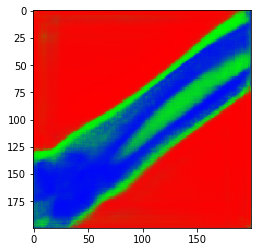

In [12]:
plt.imshow(prediction)

   Once the model has been trained in Python, the process of prediction must be able to be run in MatLab and C++ code. In order to do this a ```.exe``` file has beeen created which runs a prediction on the latest model file.

Let's now try to run the above using the code we have written. We will walk you through the process.